In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load and Clean Data

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/andymcdgeo/Petrophysics-Python-Series/master/Data/xeek_train_subset.csv')
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [20]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [21]:
working_df = df[["WELL", "DEPTH_MD", "RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()

In [22]:
working_df.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [23]:
working_df.head()

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000


In [24]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [25]:
working_df['LITH'] = working_df['FACIES'].map(lithology_numbers)

In [27]:
working_df['LITH_SI'] = working_df['FACIES'].map(simple_lithology_numbers)

In [28]:
working_df.head()

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH,LITH_SI
0,15/9-13,494.528,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000,Shale,3
1,15/9-13,494.680,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000,Shale,3
2,15/9-13,494.832,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000,Shale,3
3,15/9-13,494.984,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000,Shale,3
4,15/9-13,495.136,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000,Shale,3


# EDA

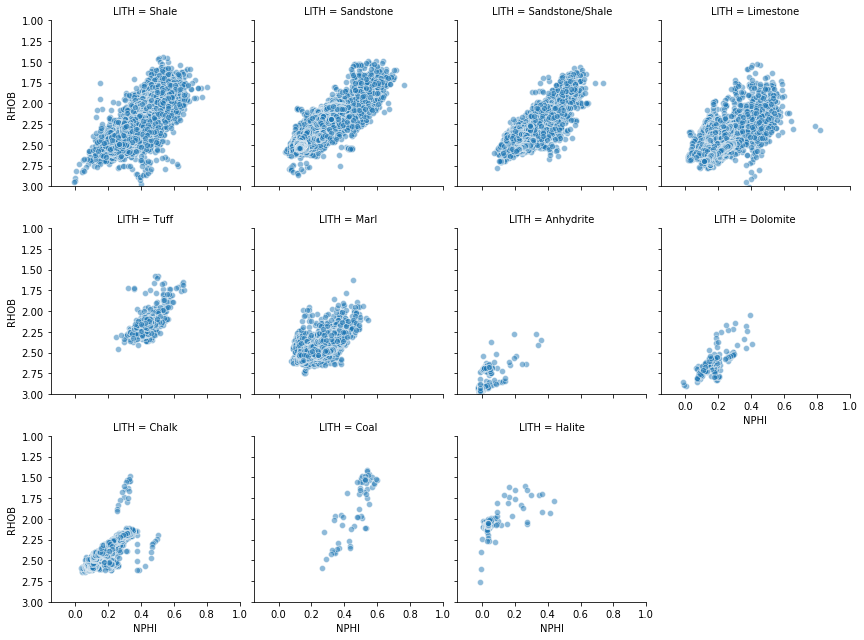

In [29]:
g = sns.FacetGrid(working_df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15,1))
g.set(ylim=(3,1))

# Create Some Functions

### Plot Function

In [30]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
    # setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    #create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # loop thru each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster = np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im = ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto', vmin=dataframe[curve].min(), 
                                vmax=dataframe[curve].max(), extent=[0, 20, depth_curve.max(), depth_curve.min()])
        else:
            ax[i].plot(dataframe[curve], depth_curve)
            
        #setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        #we want to pass in the deepest depth first so we are displaying the data from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        
        #only set the y label for the first track and hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible=False)
        
        # check o see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linstyle='-')
        
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

### Group Data By Well

In [31]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    wells_as_dfs = []
    wells_wellnames = []
    
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)
        
    print('index wellname')
    for i, name in enumerate(wells_wellnames):
        print(f"{i}    {name}")
        
    return wells_as_dfs, wells_wellnames

In [32]:
grouped_wells, grouped_names = well_splitter(working_df, 'WELL')

index wellname
0    15/9-13
1    15/9-15
2    15/9-17
3    16/1-2
4    16/1-6 A
5    16/10-1
6    16/10-2
7    16/10-3
8    16/10-5
9    16/11-1 ST3
10    16/2-11 A
11    16/2-16


# Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Elbow Plot

In [48]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [49]:
# drop any missing values
working_df.dropna(inplace=True)

In [50]:
working_df.describe()

,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI
count,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000
mean,2026.091770,1.949349,2.216580,67.769272,0.364413,4.617041,116.211408,62691.493352,3.355848
std,622.447842,16.295946,0.225473,36.640160,0.139758,3.937549,30.752148,13172.216175,1.671553
min,705.550396,0.123068,1.412190,5.782680,-0.005300,1.126667,7.415132,30000.000000,1.000000
25%,1516.358446,0.737603,2.034906,44.220089,0.243001,3.140069,86.331350,65000.000000,3.000000
50%,2010.897600,1.098597,2.178304,64.679111,0.403345,4.012710,125.787430,65000.000000,3.000000
75%,2569.647947,1.771478,2.421446,87.443424,0.484445,5.247028,144.037128,65030.000000,3.000000
max,3198.760000,1856.935059,3.005321,804.298950,0.800262,288.103638,230.432953,99000.000000,11.000000


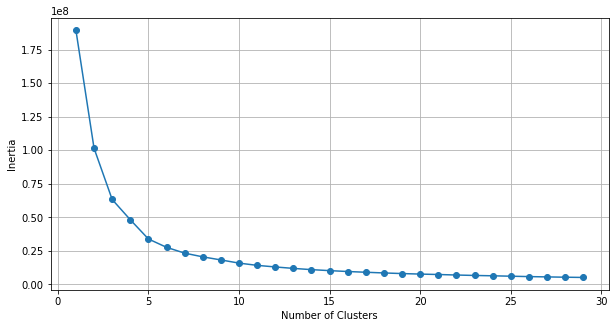

In [51]:
optimise_k_means(working_df[['GR', 'RHOB', 'NPHI', 'DTC']], 30)

### Fitting the Clustering Models

In [52]:
# create the KMeans model with the selected nubmer of clusters
kmeans = KMeans(n_clusters=5)

# fit the model to our dataset
kmeans.fit(working_df[['GR', 'RHOB', 'NPHI', 'DTC']])

# assign the data back to working_df
working_df['KMeans'] = kmeans.labels_

In [53]:
# create the GMM model with the selected number of clusters
gmm = GaussianMixture(n_components=5)

# fit the model to our data
gmm.fit(working_df[['GR', 'RHOB', 'NPHI', 'DTC']])

# predict the labels
gmm_labels = gmm.predict(working_df[['GR', 'RHOB', 'NPHI', 'DTC']])

# assign the data back to working_df
working_df['GMM'] = gmm_labels

### Plot Results

In [54]:
dfs_wells, wellnames = well_splitter(working_df, 'WELL')

index wellname
0    15/9-13
1    15/9-15
2    15/9-17
3    16/1-6 A
4    16/10-1
5    16/10-2
6    16/10-3
7    16/10-5
8    16/2-11 A
9    16/2-16


In [57]:
dfs_wells[4].head()

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH,LITH_SI,KMeans,GMM
65096,16/10-1,1412.51979,0.923066,1.961612,103.600403,0.480234,4.791432,114.229187,65000,Shale,3,3,1
65097,16/10-1,1412.67179,0.925421,1.980005,99.298676,0.514081,4.711195,150.677414,65000,Shale,3,0,3
65098,16/10-1,1412.82379,0.927775,1.997064,95.139252,0.519465,5.057112,158.996140,65000,Shale,3,0,3
65099,16/10-1,1412.97579,0.930130,2.003012,92.596954,0.535968,5.215245,230.432953,65000,Shale,3,0,1
65100,16/10-1,1413.12779,0.932485,2.008832,94.030479,0.578836,5.048790,227.664078,65000,Shale,3,0,1


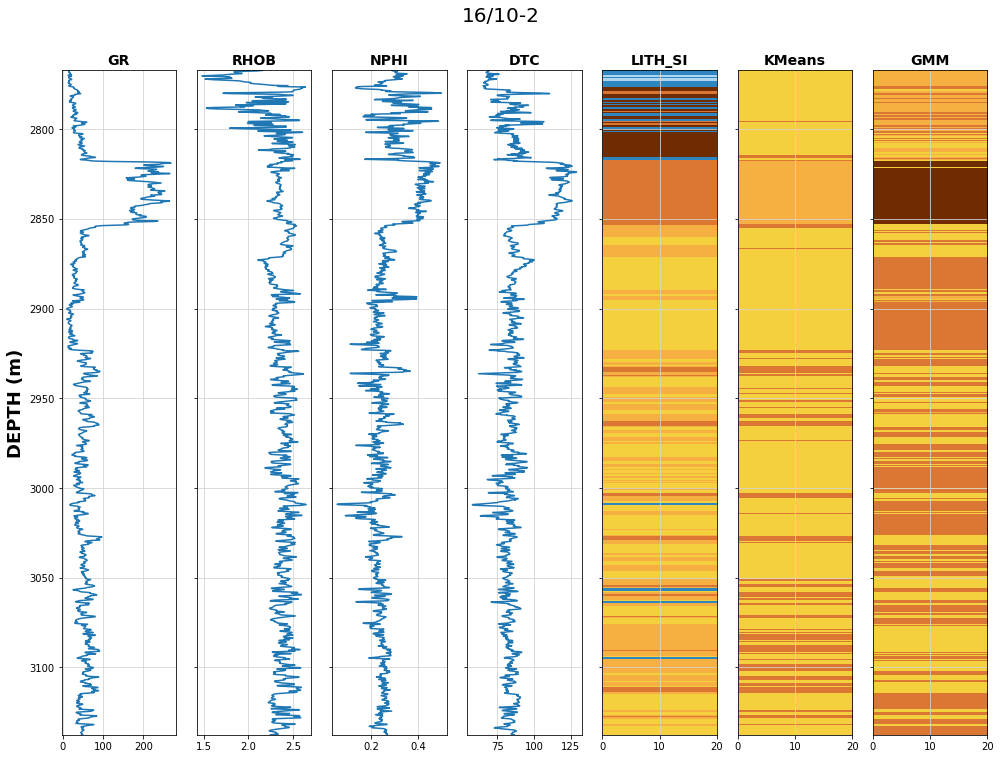

In [70]:
# setup the curves to plot
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC', 'LITH_SI', 'KMeans', 'GMM']
logarithmic_curves = ['RDEP']
facies_curves = ['KMeans', 'GMM', 'LITH_SI']

# create a plot by passing in the relevant well index number
well = 5
cmap_facies = create_plot(wellnames[well],
                          dfs_wells[well],
                          curves_to_plot,
                          dfs_wells[well]['DEPTH_MD'],
                          logarithmic_curves,
                          facies_curves)

### Scatterplots

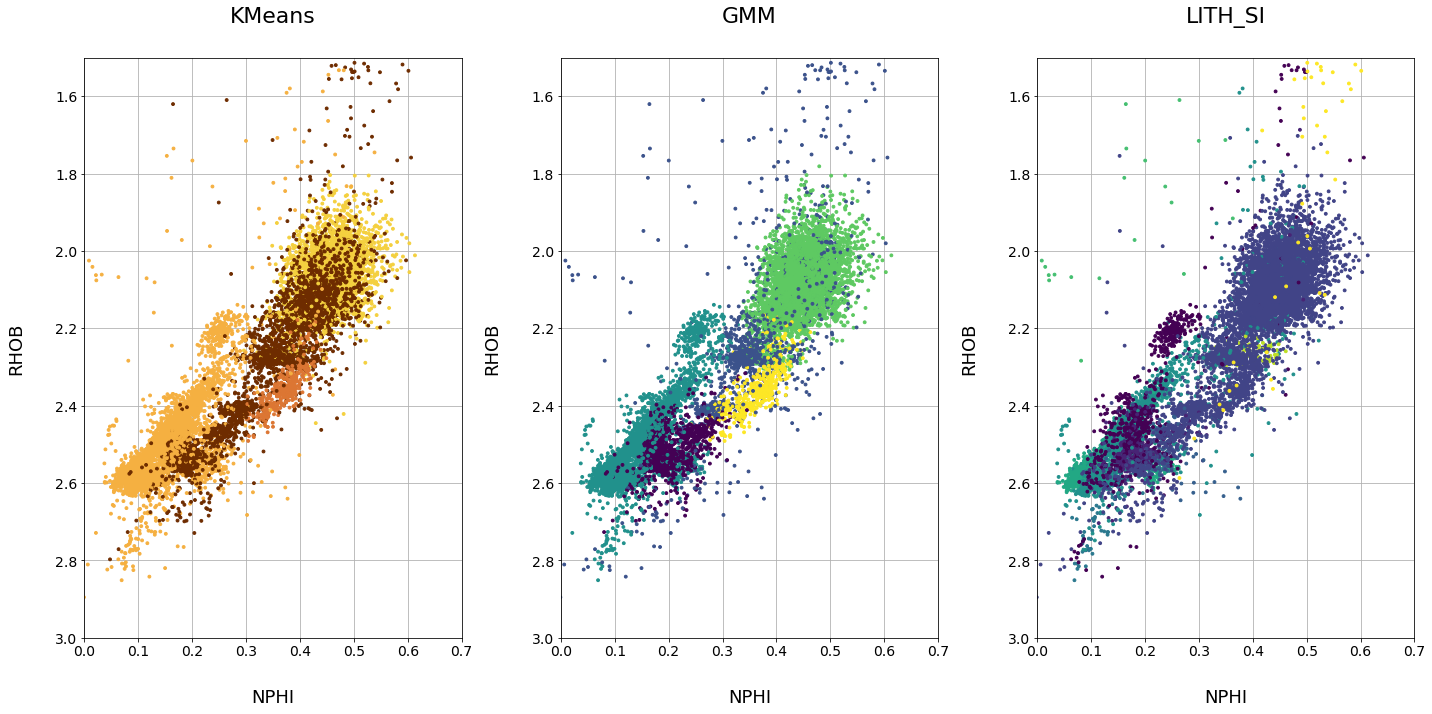

In [64]:
fig, ax = plt.subplots(figsize=(20,10))

ax1 = plt.subplot2grid((1,3), (0,0))
ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['KMeans'], s=8, cmap=cmap_facies)
ax1.set_title('KMeans', fontsize=22, y=1.05)

ax2 = plt.subplot2grid((1,3), (0,1))
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['GMM'], s=8)
ax2.set_title('GMM', fontsize=22, y=1.05)

ax3 = plt.subplot2grid((1,3), (0,2))
ax3.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['LITH_SI'], s=8)
ax3.set_title('LITH_SI', fontsize=22, y=1.05)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)
    ax.tick_params(axis='both', labelsize=14)
    
plt.tight_layout()

### Pairplot

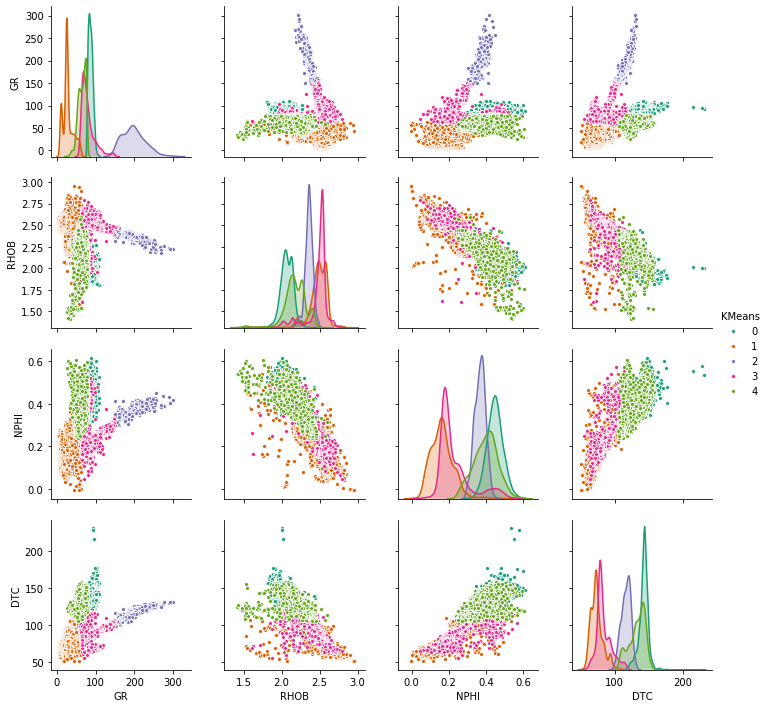

In [69]:
sns.pairplot(dfs_wells[well], vars=['GR', 'RHOB', 'NPHI', 'DTC'], hue='KMeans', palette='Dark2',
            diag_kind='kde', plot_kws = {'s':15, 'marker':'o', 'alpha':1})

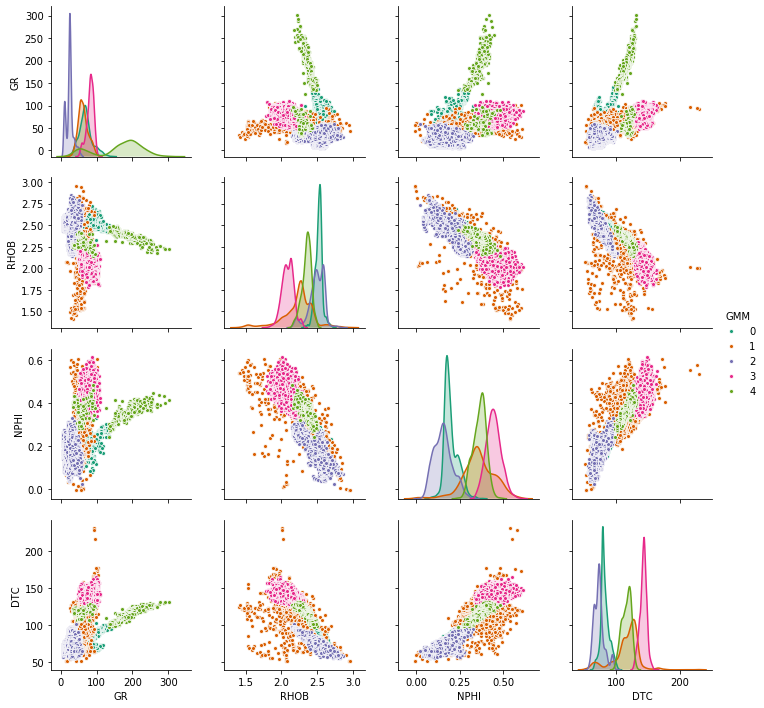

In [68]:
sns.pairplot(dfs_wells[well], vars=['GR', 'RHOB', 'NPHI', 'DTC'], hue='GMM', palette='Dark2',
            diag_kind='kde', plot_kws = {'s':15, 'marker':'o', 'alpha':1})